In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [4]:
import pandas as pd
import os

data_path = '../data/raw/housing.csv'

df = pd.read_csv(data_path)

print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
display(df.head())

Размер датасета: (20640, 10)

Первые 5 строк:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print("Основная информация:")
df.info()

print("\nСтатистика по числовым колонкам:")
display(df.describe())

print("\nПроверка пропущенных значений:")
missing = df.isnull().sum()
print(missing[missing > 0])

Основная информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Статистика по числовым колонкам:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Проверка пропущенных значений:
total_bedrooms    207
dtype: int64


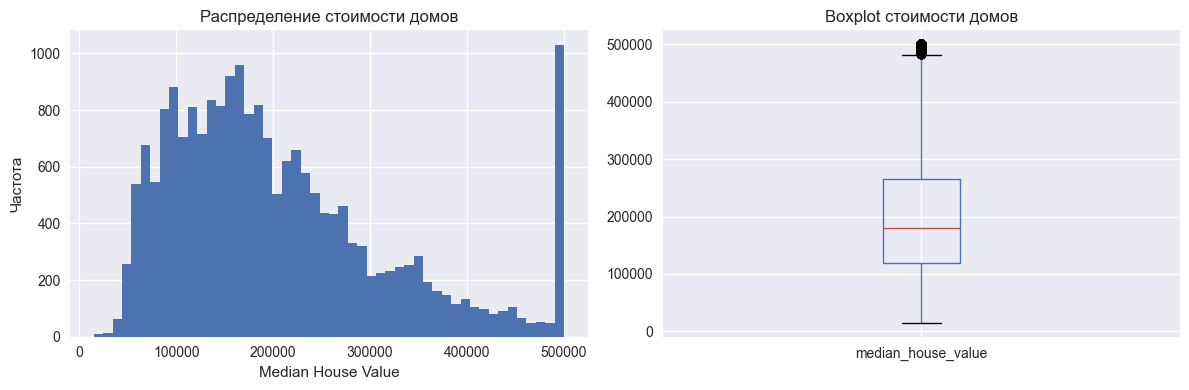

Макс значение: 500001.0
Значение, выше которого находится 1% данных: 500001.0


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df['median_house_value'].hist(bins=50, ax=axes[0])
axes[0].set_title('Распределение стоимости домов')
axes[0].set_xlabel('Median House Value')
axes[0].set_ylabel('Частота')

df.boxplot(column='median_house_value', ax=axes[1])
axes[1].set_title('Boxplot стоимости домов')

plt.tight_layout()
plt.show()

print(f"Макс значение: {df['median_house_value'].max()}")
print(f"Значение, выше которого находится 1% данных: {df['median_house_value'].quantile(0.99)}")

Уник значения ocean_proximity:
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']

Кол-во записей по категориям:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


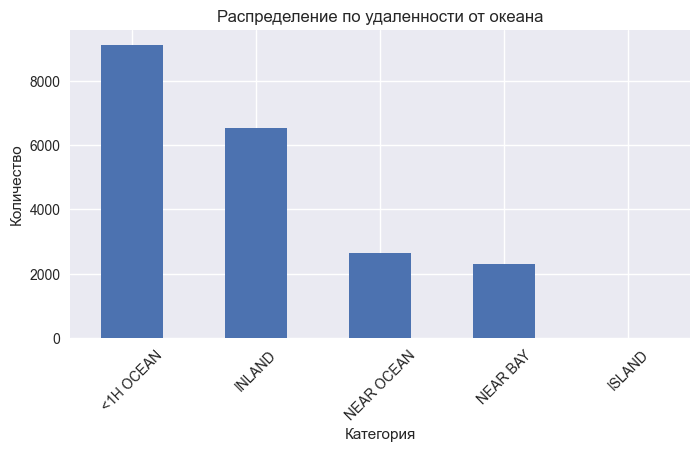

In [7]:
print("Уник значения ocean_proximity:")
print(df['ocean_proximity'].unique())

print("\nКол-во записей по категориям:")
print(df['ocean_proximity'].value_counts())

plt.figure(figsize=(8, 4))
df['ocean_proximity'].value_counts().plot(kind='bar')
plt.title('Распределение по удаленности от океана')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()